## **Import Needed Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## **Read Data and Apply EDA**

In [15]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

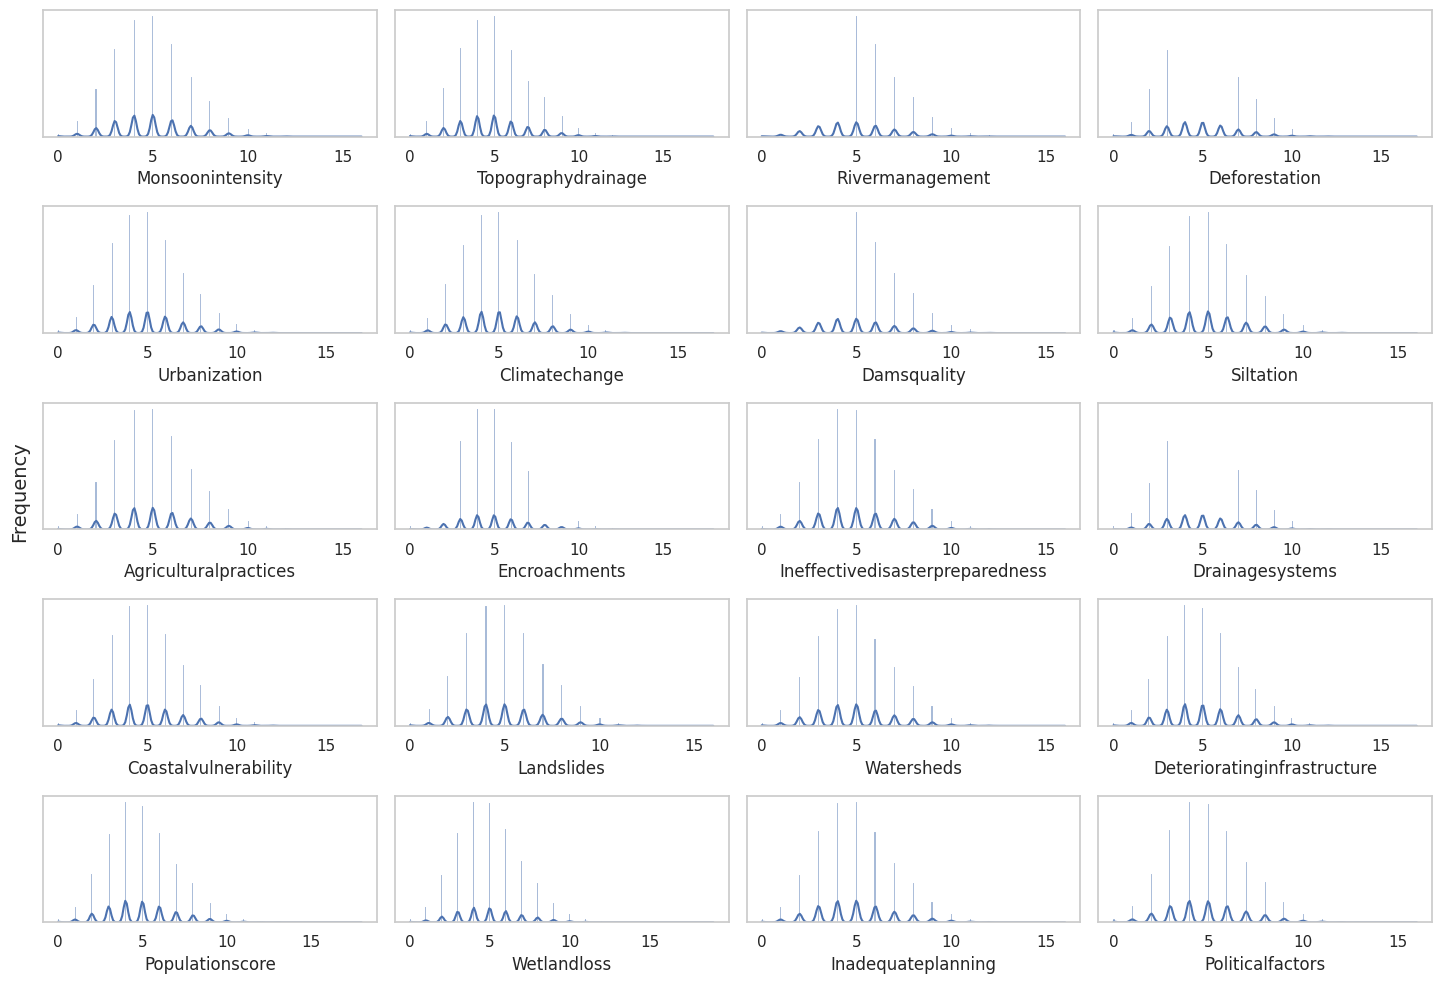

In [17]:
columns = list(train_df.columns)[1:-1]

fig = plt.figure(figsize=(15, 10))
for i in range(len(columns)):
    ax = plt.subplot(5, 4, i + 1)
    sns.histplot(train_df[columns[i]], kde=True, ax=ax)
    ax.set_xlabel(str(columns[i]).capitalize())
    ax.grid(False)
    
    ax.set_yticklabels([])
    ax.set_ylabel('')
    
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.05, 0, 1, 1])

plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = train_df.drop(columns=['id']).corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## **Data Preprocessing**

In [19]:
X = train_df.iloc[:, 1:-1]
y = train_df.iloc[:, -1]

**Data Scaling**

In [20]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

**Data Splitting**

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Machine Learning Algorithms**

### **Linear Regression**

**Training**

In [22]:
# Model intialization
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Prediction
y_pred = lr_model.predict(X_val)

**Evaluation**

In [24]:
# Mean Absolute Error
lr_mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {np.round(lr_mae, 5)}')
# Mean Squared Error
lr_mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {np.round(lr_mse, 5)}')
# R-square score
lr_r2 = r2_score(y_val, y_pred)
print(f'R-Squared Score: {np.round(lr_r2 * 100, 3)}')

Mean Absolute Error: 0.01579
Mean Squared Error: 0.0004
R-Squared Score: 84.488
